In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn import tree
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [2]:
data = pd.read_csv('Data/movie_metadata1.csv')
print(f'Shape of Data {data.shape}')

Shape of Data (5043, 28)


In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5043 non-null   object 
 1   director_name              5043 non-null   object 
 2   num_critic_for_reviews     5043 non-null   int64  
 3   duration                   5043 non-null   int64  
 4   director_facebook_likes    5043 non-null   int64  
 5   actor_3_facebook_likes     5043 non-null   int64  
 6   actor_2_name               5043 non-null   object 
 7   actor_1_facebook_likes     5043 non-null   int64  
 8   gross                      5043 non-null   int64  
 9   genres                     5043 non-null   object 
 10  actor_1_name               5043 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
data['color'].unique()

array(['Color', '49', ' Black and White'], dtype=object)

In [6]:
data[data['color']=='49']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0
279,49,Christopher Barnard,49,22,0,49,49,5,49,Comedy,...,49,49,49,49,49,49,49,7.2,49.00,0
459,49,49,95,54,49,0,Royce Johnson,577,49,Action|Adventure|Crime|Drama|Sci-Fi|Thriller,...,394,English,USA,TV-MA,49,49,4,8.8,16.00,55000
1948,49,Lasse Hallström,162,108,529,690,Henry Thomas,17000,80014842,Drama|Romance|War,...,186,English,USA,PG-13,25000000,2010,861,6.3,2.35,14000
2015,49,Mario Van Peebles,7,100,535,399,Mario Van Peebles,668,49,Action|Thriller,...,11,English,USA,PG-13,25000000,2014,535,4.1,49.00,437
2459,49,49,14,60,49,405,Dylan Walsh,654,49,Drama|Mystery,...,44,49,USA,49,49,49,426,6.7,49.00,0
2753,49,Tung-Shing Yee,53,119,3,19,Daniel Wu,556,49,Action|Crime|Drama|Thriller,...,53,Mandarin,Hong Kong,R,15000000,2009,353,7.1,2.35,821
3272,49,David Hackl,48,94,43,129,Michaela McManus,826,49,Action|Horror|Thriller,...,38,English,USA,R,10000000,2015,476,5.3,1.85,0
3539,49,Richard Rich,2,45,24,29,Kate Higgins,122,49,Action|Adventure|Animation|Comedy|Drama|Family...,...,6,49,USA,49,7000000,2014,35,6.0,49.00,41
3638,49,Wayne Wang,56,104,61,451,Russell Wong,974,1346503,Drama|History,...,22,English,China,PG-13,6000000,2011,595,6.1,2.35,0


In [7]:
data['director_facebook_likes']

0           0
1         563
2           0
3       22000
4         131
        ...  
5038        2
5039       49
5040        0
5041        0
5042       16
Name: director_facebook_likes, Length: 5043, dtype: int64

In [8]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
newdata=data.iloc[:,4:6]

In [10]:
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
...,...,...
5038,2,318
5039,49,319
5040,0,0
5041,0,489


In [11]:
kmeans=KMeans(n_clusters=5)

In [12]:
kmeans.fit(newdata)

KMeans(n_clusters=5)

In [13]:
kmeans.cluster_centers_

array([[  128.81785103,   383.29366438],
       [14677.77777778,  1368.66666667],
       [  371.4625    , 11625.        ],
       [  178.52702703,  3283.78378378],
       [ 2945.94594595,   782.91891892]])

In [14]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 0 0 0]
5043


In [15]:
#print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{np.int32(0): np.int64(4672), np.int32(1): np.int64(180), np.int32(2): np.int64(80), np.int32(3): np.int64(74), np.int32(4): np.int64(37)}


In [16]:
newdata['cluster']=kmeans.labels_
newdata

,director_facebook_likes,actor_3_facebook_likes,cluster
0,0,855,0
1,563,1000,0
2,0,161,0
3,22000,23000,1
4,131,49,0
...,...,...,...
5038,2,318,0
5039,49,319,0
5040,0,0,0
5041,0,489,0


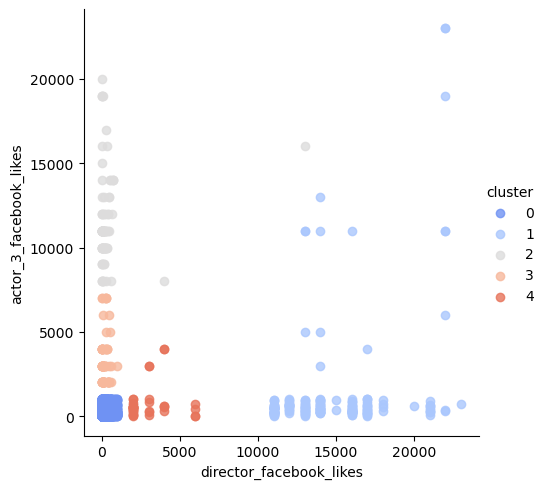

In [17]:
sns.lmplot(x='director_facebook_likes',y='actor_3_facebook_likes',data=newdata,hue='cluster',palette='coolwarm',aspect=1,fit_reg=False)

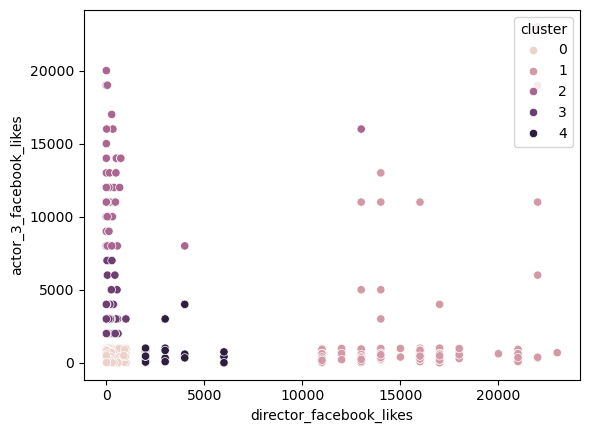

In [41]:
sns.scatterplot(x='director_facebook_likes',y='actor_3_facebook_likes',data=newdata,hue='cluster')
plt.title=("Visualization")
plt.xlabel('director_facebook_likes')
plt.ylabel('actor_3_facebook_likes')
plt.legend(title='cluster',loc="upper right")


In [42]:
# Fizzy C maean clustering

In [43]:
# Heirachical Clustering
#!pip install spicy


In [44]:
data=pd.read_csv('Data/movie_metadata1.csv')

In [45]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0


In [46]:
f1=data['budget'].values
f1

array([237000000, 300000000, 245000000, ...,      1400,        49,
            1100])

In [47]:
f2=data['gross'].values
f2

array([760505847, 309404152, 200074175, ...,        49,     10443,
           85222])

In [48]:
fb=f2[0:10]
fb

array([760505847, 309404152, 200074175, 448130642,        49,  73058679,
       336530303, 200807262, 458991599, 301956980])

In [49]:
fg=f2[0:10]
fg

array([760505847, 309404152, 200074175, 448130642,        49,  73058679,
       336530303, 200807262, 458991599, 301956980])

In [50]:
X=np.array(list(zip(fb,fg)))
X

array([[760505847, 760505847],
       [309404152, 309404152],
       [200074175, 200074175],
       [448130642, 448130642],
       [       49,        49],
       [ 73058679,  73058679],
       [336530303, 336530303],
       [200807262, 200807262],
       [458991599, 458991599],
       [301956980, 301956980]])

In [51]:
Z=linkage(X,'ward')
Z

array([[2.00000000e+00, 7.00000000e+00, 1.03674158e+06, 2.00000000e+00],
       [1.00000000e+00, 9.00000000e+00, 1.05318916e+07, 2.00000000e+00],
       [3.00000000e+00, 8.00000000e+00, 1.53597127e+07, 2.00000000e+00],
       [6.00000000e+00, 1.10000000e+01, 5.03774096e+07, 3.00000000e+00],
       [4.00000000e+00, 5.00000000e+00, 1.03320505e+08, 2.00000000e+00],
       [1.00000000e+01, 1.30000000e+01, 2.53098416e+08, 5.00000000e+00],
       [1.20000000e+01, 1.50000000e+01, 4.39381685e+08, 7.00000000e+00],
       [1.40000000e+01, 1.60000000e+01, 7.12764196e+08, 9.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 9.51971810e+08, 1.00000000e+01]])

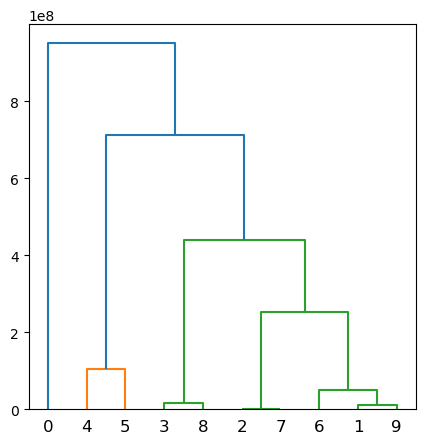

In [52]:
fig=plt.figure(figsize=(5,5))
dn=dendrogram(Z)

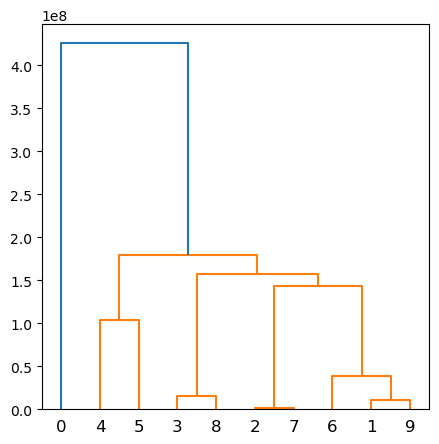

In [53]:
Z=linkage(X,'single')
fig=plt.figure(figsize=(5,5))
dn=dendrogram(Z)

In [54]:
merge=linkage(X,'complete')


In [61]:
label=cut_tree(merge,n_clusters=3).reshape(-1,)
label

array([0, 1, 1, 1, 2, 2, 1, 1, 1, 1])

In [62]:
final=pd.DataFrame(X,columns=['B','G'])

In [63]:
final['cluster']=label

In [64]:
final

,B,G,cluster
0,760505847,760505847,0
1,309404152,309404152,1
2,200074175,200074175,1
3,448130642,448130642,1
4,49,49,2
5,73058679,73058679,2
6,336530303,336530303,1
7,200807262,200807262,1
8,458991599,458991599,1
9,301956980,301956980,1


<Axes: xlabel='cluster', ylabel='G'>

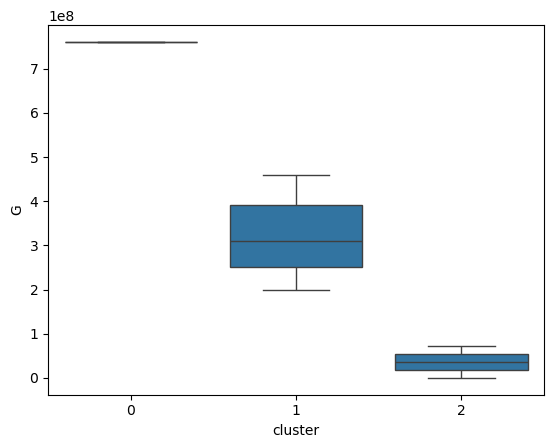

In [66]:
sns.boxplot(x='cluster',y='G',data=final)